## Imports

In [133]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 
from scipy import stats as scp

##Graphs

In [134]:
florida_g = nx.read_graphml("Florida_foodweb.graphml")
jazz_g = nx.read_gml("graph_jazz_collab.gml", label='id')
jazz_rand_g = nx.read_gml("graph_jazz_collab_random.gml", label='id')
polblog_g = nx.read_gml("graph_polblog.gml", label='id')
polblog_rand_g = nx.read_gml("graph_polblog_random.gml", label='id')
terr_g = nx.read_gml("graph_terrorists.gml", label='id')
terr_rand_g = nx.read_gml("graph_terrorists_random.gml", label='id')

graph_list = [
    jazz_g,
    polblog_g,
    terr_g
    ]

rand_graph_list = [
    jazz_rand_g,
    polblog_rand_g,
    terr_rand_g
]

output_strings = [
    "Jazz collaboration network",
    "Political blogs network",
    "9-11 terrorist network"
]

str_n_graphs = list(zip(output_strings, graph_list))
str_n_rand_graphs = list(zip([s+" randomized" for s in output_strings], rand_graph_list))

## A03.1 Correlation coefficients

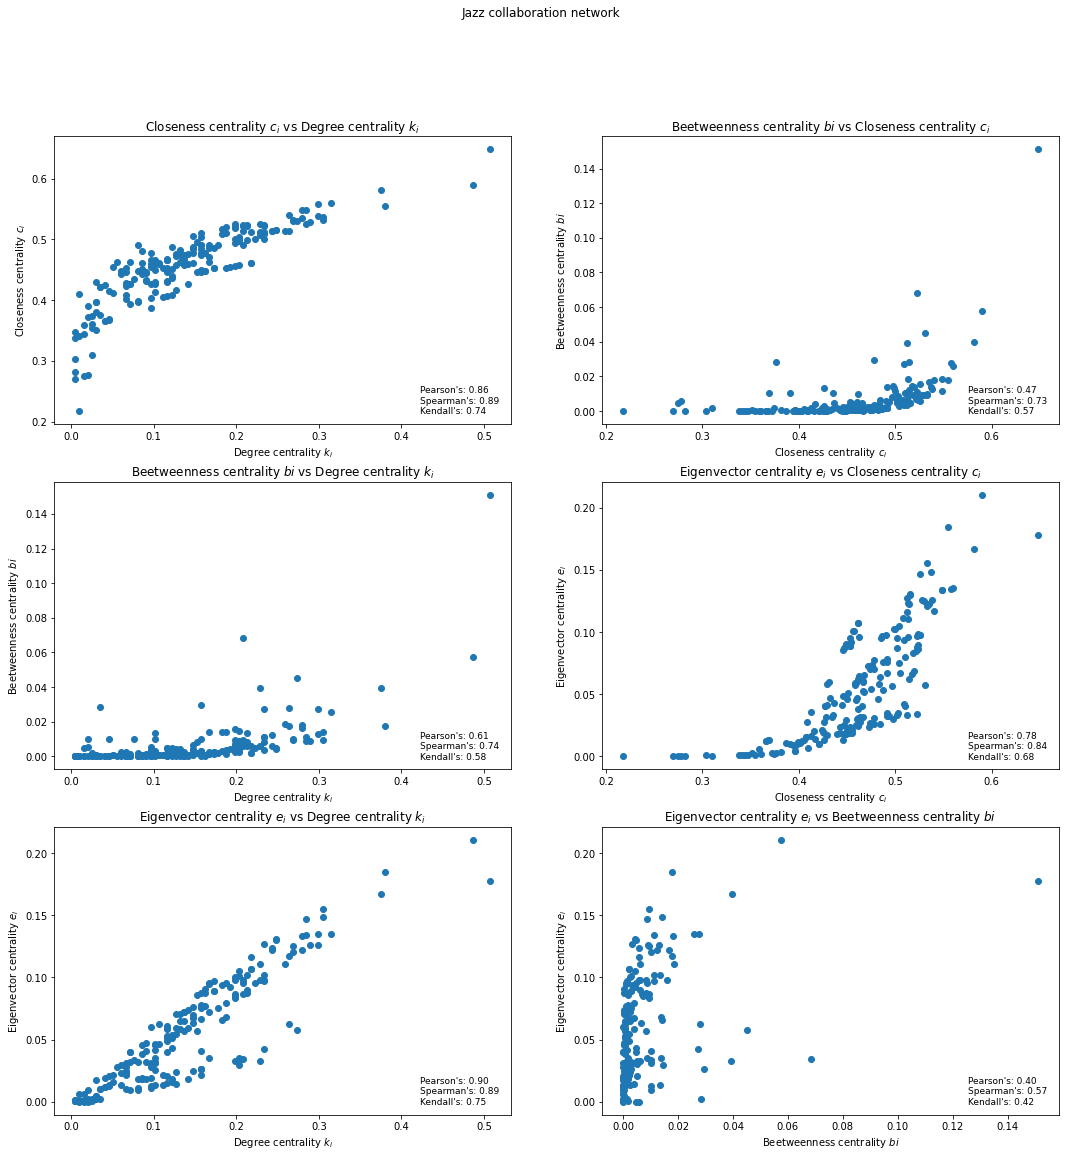

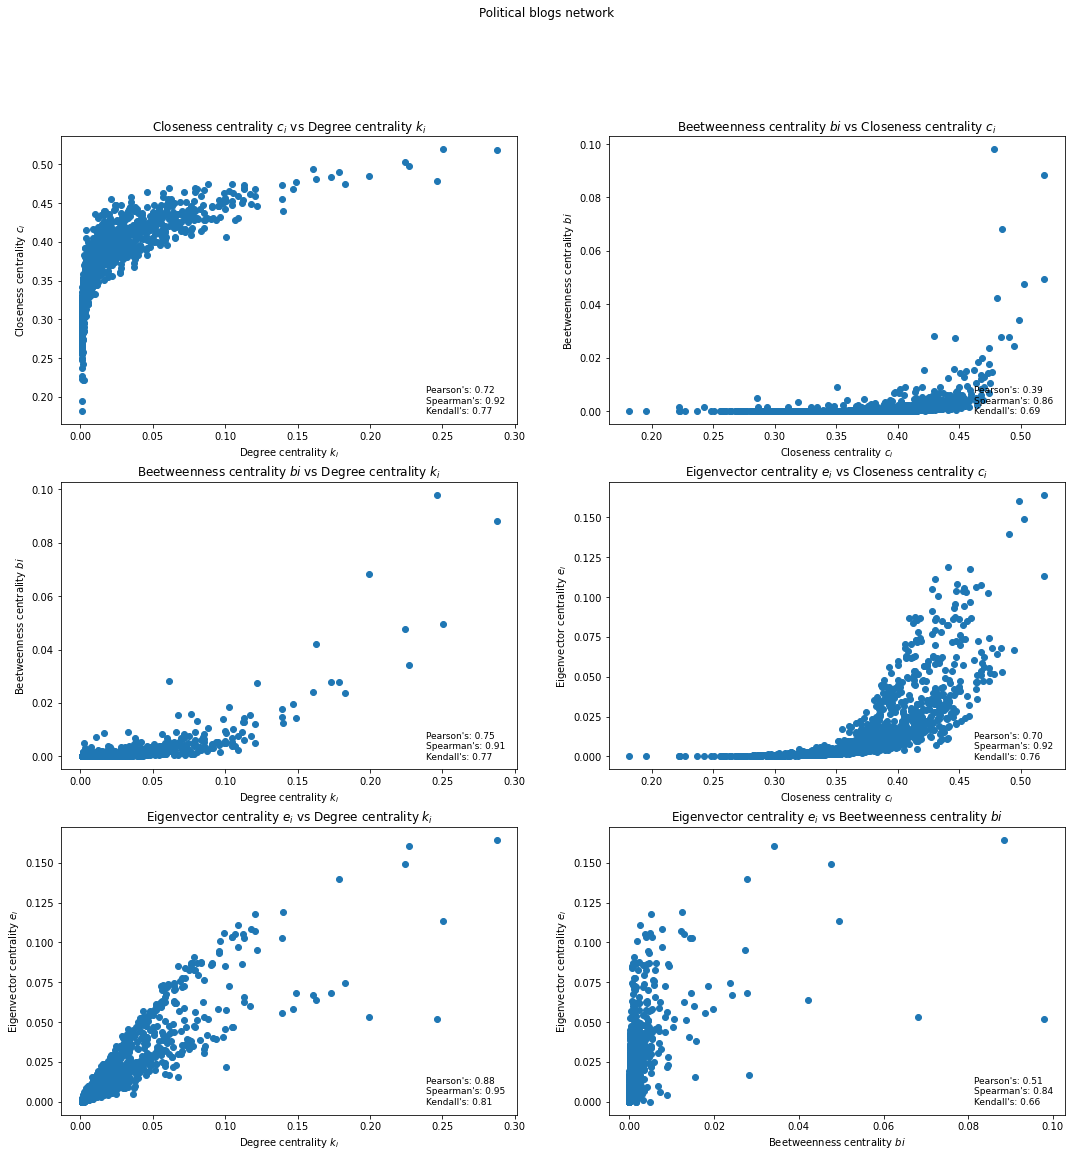

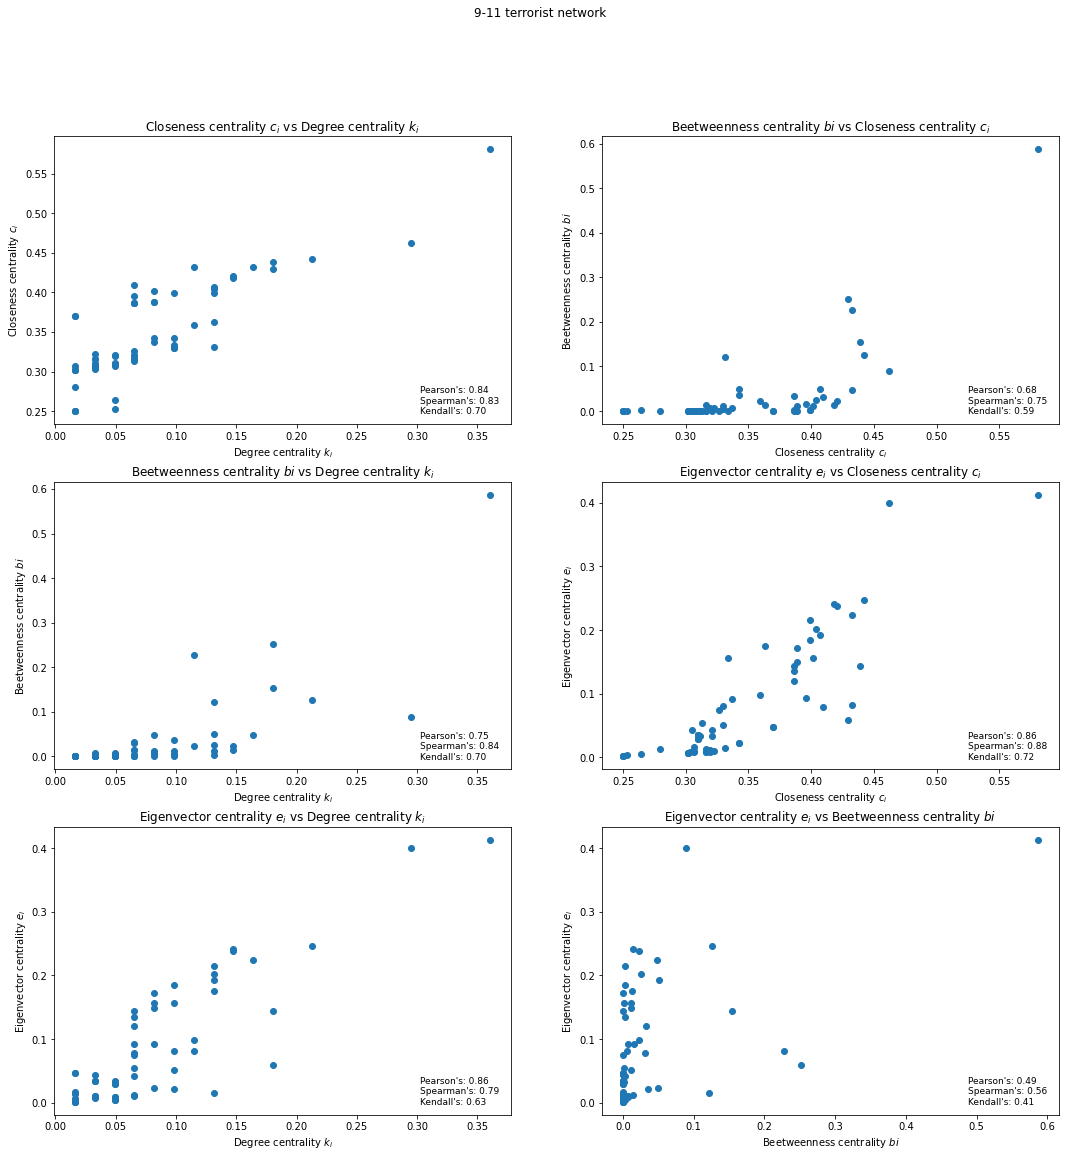

In [135]:
fgsz = 18

for graph_str, graph in str_n_graphs:
  centralities = [
      ("Degree centrality $k_{i}$", nx.degree_centrality(graph)),
      ("Closeness centrality $c_{i}$", nx.closeness_centrality(graph)),
      ("Beetweenness centrality $b{i}$", nx.betweenness_centrality(graph)),
      ("Eigenvector centrality $e_{i}$", nx.eigenvector_centrality(graph))
  ]
  centr_amt = len(centralities)
  combs = [(i,j) for i in range(centr_amt) for j in range(i+1, centr_amt)]
  figure, axis = plt.subplots(3, 2, figsize=(fgsz, fgsz))
  coeffs = ["Pearson's", "Spearman's", "Kendall's"]
  for i in range(int(centr_amt*(centr_amt-1)/2)):
    ax = axis[i % 3, i // 3]
    x_vals = list(centralities[combs[i][0]][1].values())
    y_vals = list(centralities[combs[i][1]][1].values())
    x_title = centralities[combs[i][0]][0]
    y_title = centralities[combs[i][1]][0]
    coeff_vals = [
        scp.pearsonr(x_vals, y_vals),
        scp.spearmanr(x_vals, y_vals),
        scp.kendalltau(x_vals, y_vals)
    ]
    ax.scatter(
        x_vals,
        y_vals
        )
    coeff_txt = ""
    for j, coeff in enumerate(coeff_vals):
        coeff_txt = coeff_txt + "{}: {:.2f}\n".format(coeffs[j], coeff[0])
    ax.text(0.8, 0, coeff_txt, transform=ax.transAxes, fontsize=9)
    ax.set_title(f"{y_title} vs {x_title}")
    ax.set_ylabel(f"{y_title}")
    ax.set_xlabel(f"{x_title}")
  figure.suptitle(graph_str)

The degree centrality $k_i$ in the jazz collaboration graph shows only a few "popular" nodes, with a connection amount which is almost as high as the max degree. In this graph this shows that there were a only a few jazz musicians collaborated in bands.





The closeness centrality $c_i$ in the jazz collaboration graph shows, that information spreads in a decent amount of time, since $c_i$ is on average higher than approximately $\frac{1}{2}$. Hence, applied on this particular graph, on average a jazz musician could quickly collaborate in bands, without the need of passing the request through a big amount of other musicians.

The betweenness centrality $b_i$ in the jazz collaboration graph shows, that there are very few nodes, which have a large influence on the information flow. This indicates that if information needs to be shared between two nodes, the other nodes which where just passed by on the shortest path are usually not the same. 

The eigenvector centrality $e_i$ in the jazz collaboration graph shows that most of the nodes with a high degree are not connected to other nodes with high degree. Therefore it shows, that there were only a few musicians collaborating in bands in which there were others also collaborating a lot.

## A03.2 Centrality and randomisation

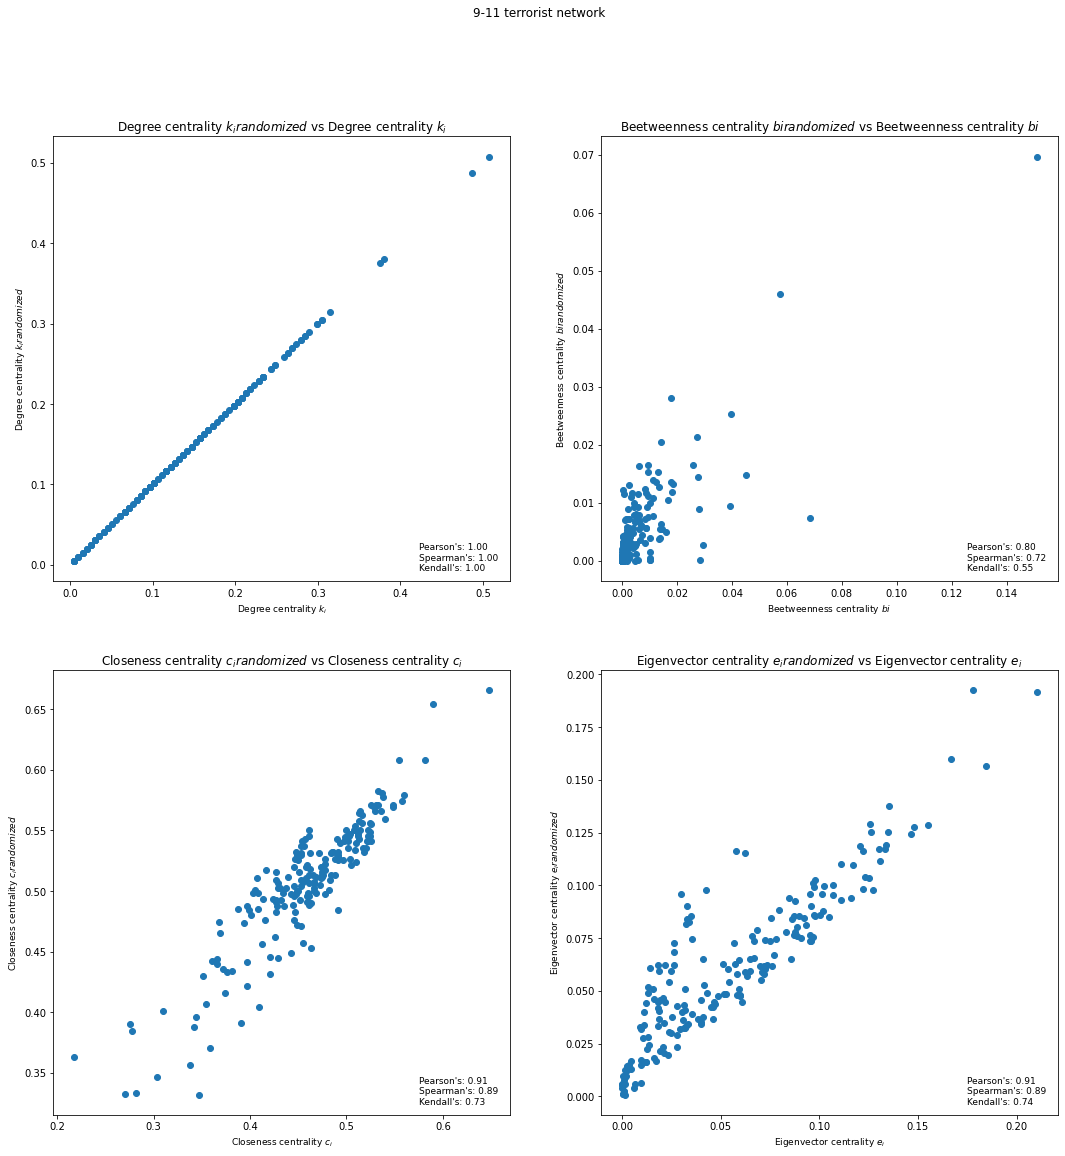

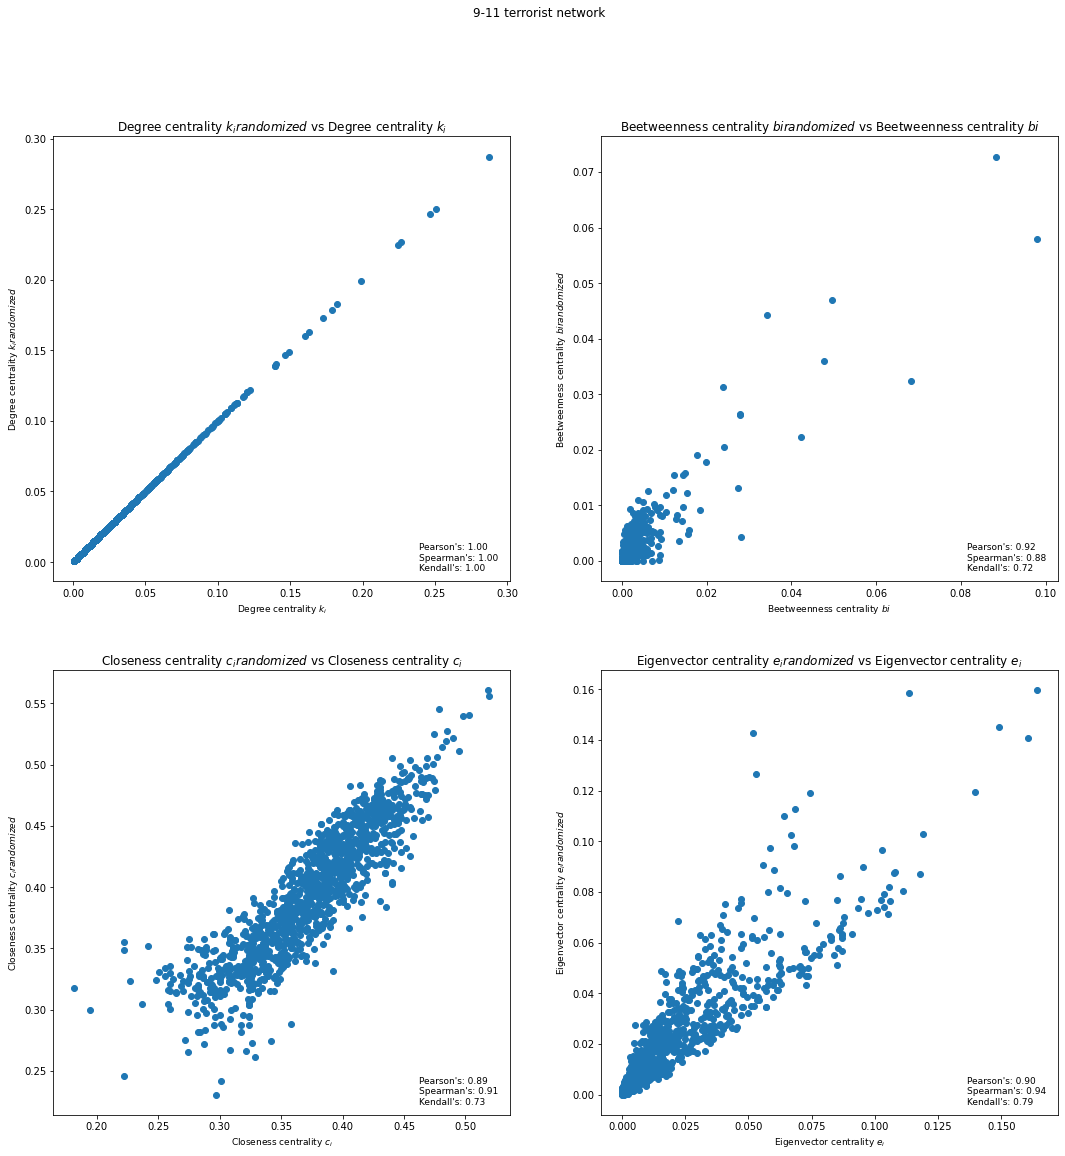

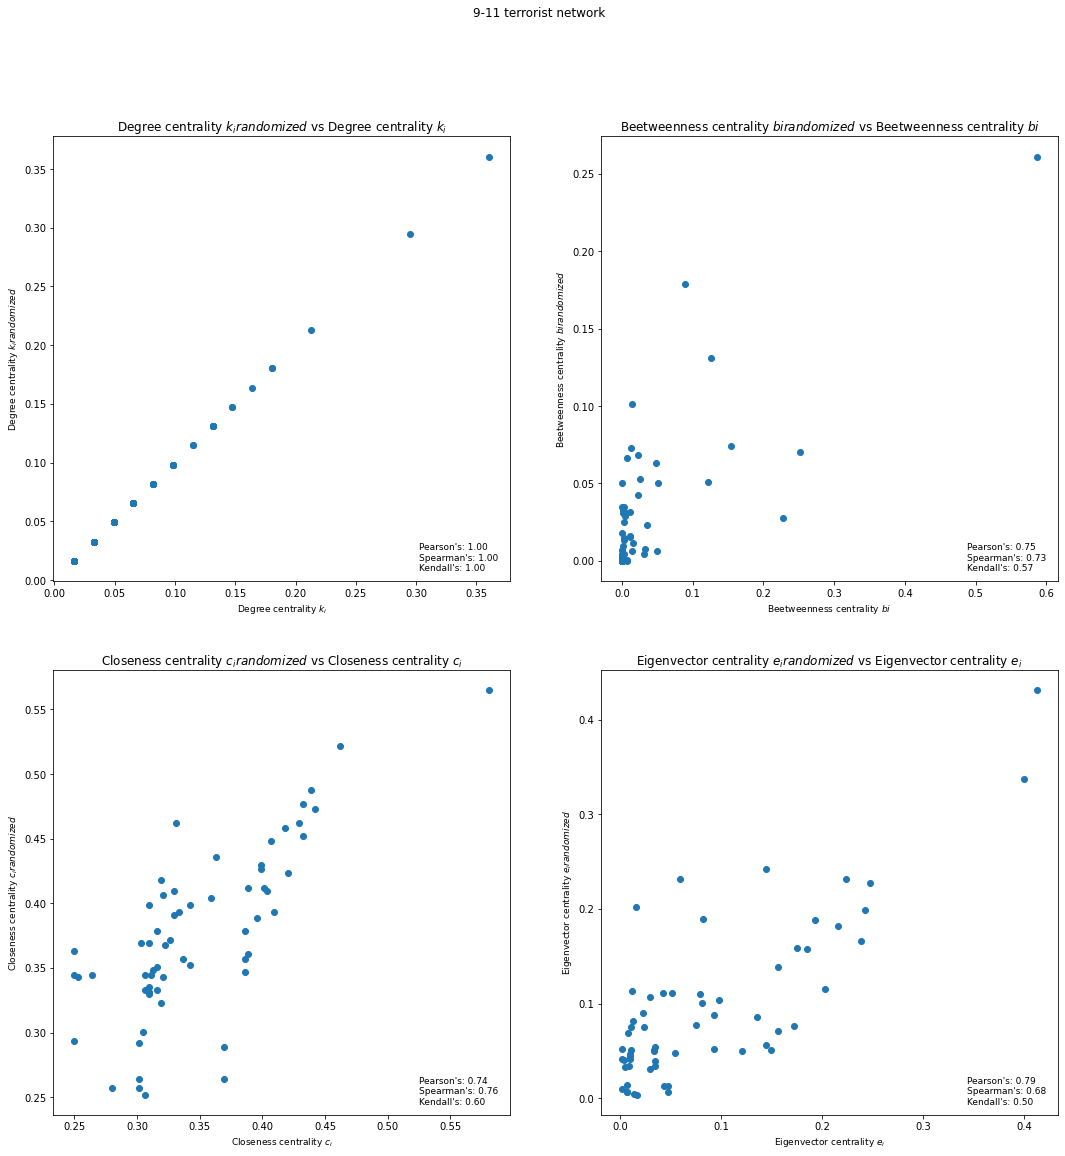

In [136]:
i = 0
j = 0
for k, rand_graph_tup in enumerate(str_n_rand_graphs):
  rand_graph = rand_graph_tup[1]
  centralities_rand  = [
      ("Degree centrality $k_{i} randomized$", nx.degree_centrality(rand_graph)),
      ("Closeness centrality $c_{i} randomized$", nx.closeness_centrality(rand_graph)),
      ("Beetweenness centrality $b{i} randomized$", nx.betweenness_centrality(rand_graph)),
      ("Eigenvector centrality $e_{i} randomized$", nx.eigenvector_centrality(rand_graph))
  ]
  graph = str_n_graphs[k][1]
  centralities = [
      ("Degree centrality $k_{i}$", nx.degree_centrality(graph)),
      ("Closeness centrality $c_{i}$", nx.closeness_centrality(graph)),
      ("Beetweenness centrality $b{i}$", nx.betweenness_centrality(graph)),
      ("Eigenvector centrality $e_{i}$", nx.eigenvector_centrality(graph))
  ]
  figure, axis = plt.subplots(2, 2, figsize=(fgsz, fgsz))
  coeffs = ["Pearson's", "Spearman's", "Kendall's"]
  for i in range(len(centralities_rand)):
    ax = axis[i % 2, i // 2]
    x_vals = list(centralities[i][1].values())
    y_vals = list(centralities_rand[i][1].values())
    x_title = centralities[i][0]
    y_title = centralities_rand[i][0]
    coeff_vals = [
        scp.pearsonr(x_vals, y_vals),
        scp.spearmanr(x_vals, y_vals),
        scp.kendalltau(x_vals, y_vals)
    ]
    ax.scatter(
        x_vals,
        y_vals
        )
    coeff_txt = ""
    for j, coeff in enumerate(coeff_vals):
        coeff_txt = coeff_txt + "{}: {:.2f}\n".format(coeffs[j], coeff[0])
    ax.text(0.8, 0, coeff_txt, transform=ax.transAxes, fontsize=9)
    ax.set_title(f"{y_title} vs {x_title}")
    ax.set_ylabel(f"{y_title}", fontsize=9)
    ax.set_xlabel(f"{x_title}", fontsize=9)
  figure.suptitle(graph_str)

Due to the linear solution $x = y$ it is given that the function `nx.algorithms.smallworld.random_reference()` preserves the degrees of the nodes, since the degree centrality $k_i$ measures the number of links each nodes has to other nodes in the network.

## A03.3 Page Rank

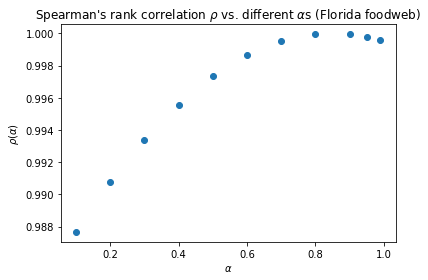

In [137]:
from re import T
alphas = [
    0.1,
    0.2,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.8,
    0.85,
    0.9,
    0.95,
    0.99
]

j = 8
pageranks = [list(nx.pagerank(florida_g, alpha=alpha).values()) for alpha in alphas]
pr_x = pageranks[j]
spearmans_corrs = [scp.pearsonr(pr_x, pr)[0] for i, pr in enumerate(pageranks) if i != j]

plt.scatter(alphas[:j]+alphas[j+1:], spearmans_corrs)
plt.xlabel("$\\alpha$")
plt.ylabel("$\\rho(\\alpha)$")
plt.title("Spearman's rank correlation $\\rho$ vs. different $\\alpha$s (Florida foodweb)")
plt.show()